In [351]:
import pandas as pd
import matplotlib.pyplot as plt
file_name = "movies.tsv" #load movies database
movie = pd.read_csv(file_name, sep='\t') #read data


In [352]:
movie.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"


In [353]:
ratings = "ratings.tsv" #load database
rating = pd.read_csv(ratings, sep='\t') #read data

In [354]:
rating.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1490
1,tt0000002,6.3,180
2,tt0000003,6.6,1125


In [357]:
merge=pd.merge(movie, rating)#marging movies and ratings data set together
merge.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1490
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.3,180
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance",6.6,1125


In [358]:
merge_m=merge.sort_values(by=['startYear']).reset_index() #sort data by year and assign new index

In [359]:
merge_m.head(3)

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,187799,tt0343112,short,Traffic Crossing Leeds Bridge,Traffic Crossing Leeds Bridge,0.0,1888,\N,0,"Documentary,Short",6.8,2468
1,208272,tt0392728,short,Roundhay Garden Scene,Roundhay Garden Scene,0.0,1888,\N,1,"Documentary,Short",7.5,4828
2,237824,tt0466876,short,"Leisurely Pedestrians, Open Topped Buses and H...","Leisurely Pedestrians, Open Topped Buses and H...",0.0,1889,\N,\N,"Documentary,Short",5.5,264


In [339]:
#fileting each yearly movies user ratings and votes
animation_years=[]
animation_votes=[]
animation_ratings=[]
comedy_years=[]
comedy_votes=[]
comedy_ratings=[]
romance_years=[]
romance_votes=[]
romance_ratings=[]
thriller_years=[]
thriller_votes=[]
thriller_ratings=[]
horror_years=[]
horror_votes=[]
horror_ratings=[]
for i in range(200000,379319):#select approximate range for 2000 to 2016
    try:
        year = int(merge_m["startYear"][i])
        if year >= 2000 and year <= 2016:#exactly filter rating or votes from 2000 to 2016
            genres = merge_m["genres"][i].split(",")
            if "Action" in genres:
                animation_years.append(merge_m["startYear"][i][2:4])
                animation_votes.append(merge_m["numVotes"][i])
                animation_ratings.append(merge_m["averageRating"][i])
            elif "Comedy" in genres:
                comedy_years.append(merge_m["startYear"][i][2:4])
                comedy_votes.append(merge_m["numVotes"][i])
                comedy_ratings.append(merge_m["averageRating"][i])
            elif "Romance" in genres:
                romance_years.append(merge_m["startYear"][i][2:4])
                romance_votes.append(merge_m["numVotes"][i])
                romance_ratings.append(merge_m["averageRating"][i])
            elif "Thriller" in genres:
                thriller_years.append(merge_m["startYear"][i][2:4])
                thriller_votes.append(merge_m["numVotes"][i])
                thriller_ratings.append(merge_m["averageRating"][i])
            elif "Horror" in genres:
                horror_years.append(merge_m["startYear"][i][2:4])
                horror_votes.append(merge_m["numVotes"][i])
                horror_ratings.append(merge_m["averageRating"][i])
    except: 
        x="do nothing"


In [338]:
# print(animation_years)
# print(animation_votes)
# print(animation_ratings)
# print(comedy_years)
# print(animation_votes)
# print(animation_ratings)

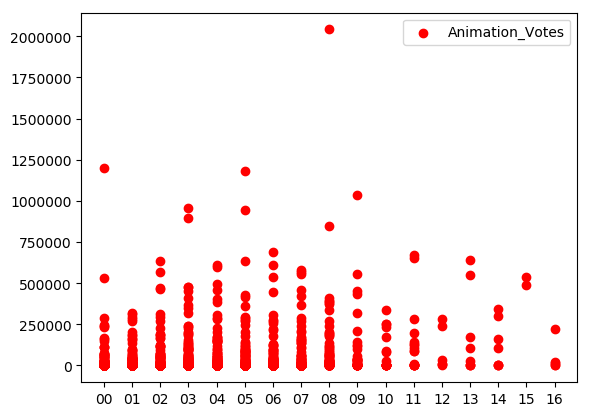

In [330]:
#plot for years and votes for individual genres

import numpy as np
import matplotlib.pyplot as plt

# define some sizes of the scatter marker
fig, ax = plt.subplots()
ax.scatter(animation_years, animation_votes, facecolor='red', label='Animation votes')
plt.legend(('Animation_Votes', 'Comedy Votes'))
plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(comedy_years, comedy_votes, facecolor='green', label='Comedy votes')
# plt.legend(('Comedy_Votes', 'Animation Votes'))
# plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(thriller_years, thriller_votes, facecolor='yellow', label='Thriller votes')
# plt.legend(('Thriller_Votes', 'Animation Votes'))
# plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(romance_years, romance_votes, facecolor='orange', label='romance votes')
# plt.legend(('Romance_Votes', 'Animation Votes'))
# plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(horror_years, horror_votes, facecolor='blue', label='horror votes')
# plt.legend(('Horror_Votes', 'Animation Votes'))
# plt.show()



In [333]:
#histogram plot
for i in range(len(comedy_years)):
    comedy_years[i] = int(comedy_years[i])+.25

for i in range(len(horror_years)):
    horror_years[i] = int(horror_years[i])+.45

for i in range(len(romance_years)):
    romance_years[i] = int(romance_years[i])+.65

for i in range(len(thriller_years)):
    thriller_years[i] = int(thriller_years[i])+.85

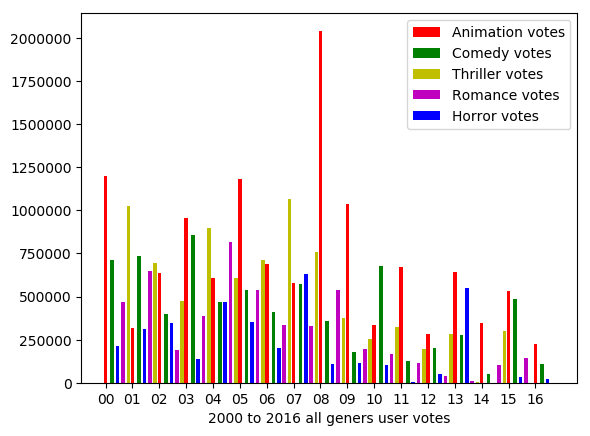

In [335]:
################ show all graph tother
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(animation_years,animation_votes,width,color='r',label='Animation votes')
ax.bar(comedy_years,comedy_votes,width,color='g',label='Comdey votes')
ax.bar(thriller_years,thriller_votes,width,color='y',label='Thriller votes')
ax.bar(romance_years,romance_votes,width,color='m',label='Rommance votes')
ax.bar(horror_years,horror_votes,width,color='b',label='Horror votes')
plt.legend(('Animation votes', 'Comedy votes','Thriller votes','Romance votes','Horror votes'))

ax.set_xlabel('2000 to 2016 all geners user votes')
plt.show()

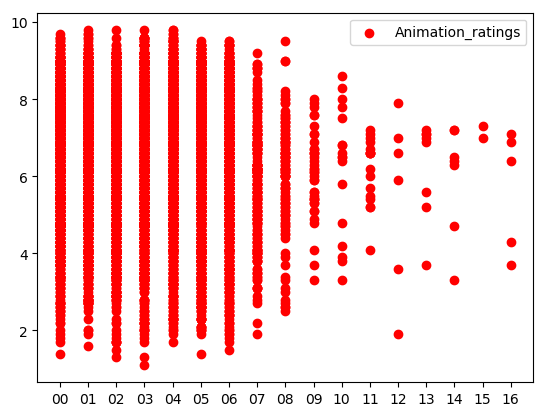

In [332]:
#plot for years and ratings for individual genres

import numpy as np
import matplotlib.pyplot as plt

# define some sizes of the scatter marker
fig, ax = plt.subplots()
ax.scatter(animation_years, animation_ratings, facecolor='red', label='Animation ratings')
plt.legend(('Animation_ratings', 'Comedy ratings'))
plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(comedy_years, comedy_ratings, facecolor='green', label='Comedy ratings')
# plt.legend(('Comedy_ratings', 'Animation ratings'))
# plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(thriller_years, thriller_ratings, facecolor='yellow', label='Thriller ratings')
# plt.legend(('Thriller_ratings', 'Animation ratings'))
# plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(romance_years, romance_ratings, facecolor='orange', label='romance ratings')
# plt.legend(('Romance_ratings', 'Animation ratings'))
# plt.show()

# ########
# fig, ax = plt.subplots()
# ax.scatter(horror_years, horror_ratings, facecolor='blue', label='horror ratings')
# plt.legend(('Horror_ratings', 'Animation ratings'))
# plt.show()

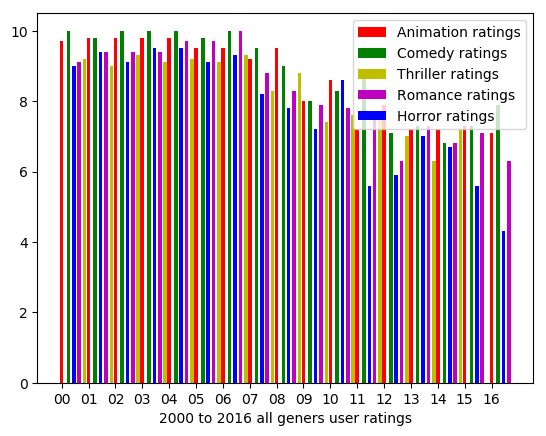

In [334]:
################ show all graph tother
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(animation_years,animation_ratings,width,color='r',label='Animation ratings')
ax.bar(comedy_years,comedy_ratings,width,color='g',label='Comdey ratings')
ax.bar(thriller_years,thriller_ratings,width,color='y',label='Thriller ratings')
ax.bar(romance_years,romance_ratings,width,color='m',label='Rommance ratings')
ax.bar(horror_years,horror_ratings,width,color='b',label='Horror ratings')
plt.legend(('Animation ratings', 'Comedy ratings','Thriller ratings','Romance ratings','Horror ratings'))

ax.set_xlabel('2000 to 2016 all geners user ratings')
plt.show()